In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# setup
import torch
import random

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

#import MNIST
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [4]:
# store all five datasets
def save_data(dataset, name):
  path = f'/content/gdrive/My Drive/Research/datasets/{name}.pth'
  print(f'Saving {name} model...')
  torch.save(dataset, path)
  print(f'{name} saved successfully.')

In [20]:
# also generate validation set
train_data_full = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)

# train_set_size = 50000
# waste_set_size = 10000
# _, validation_data = torch.utils.data.random_split(train_data_full, [train_set_size, waste_set_size])
# print(validation_data.indices)
validation_indices = list(range(20000, 25000)) + list(range(50000, 55000))
# print((validation_indices))
validation_data = torch.utils.data.Subset(train_data_full, validation_indices)

print('='*30)
print('Valid data set:', len(validation_data))
print(validation_data.indices)

save_data(validation_data, 'validation_data')

Valid data set: 10000
[20000, 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20009, 20010, 20011, 20012, 20013, 20014, 20015, 20016, 20017, 20018, 20019, 20020, 20021, 20022, 20023, 20024, 20025, 20026, 20027, 20028, 20029, 20030, 20031, 20032, 20033, 20034, 20035, 20036, 20037, 20038, 20039, 20040, 20041, 20042, 20043, 20044, 20045, 20046, 20047, 20048, 20049, 20050, 20051, 20052, 20053, 20054, 20055, 20056, 20057, 20058, 20059, 20060, 20061, 20062, 20063, 20064, 20065, 20066, 20067, 20068, 20069, 20070, 20071, 20072, 20073, 20074, 20075, 20076, 20077, 20078, 20079, 20080, 20081, 20082, 20083, 20084, 20085, 20086, 20087, 20088, 20089, 20090, 20091, 20092, 20093, 20094, 20095, 20096, 20097, 20098, 20099, 20100, 20101, 20102, 20103, 20104, 20105, 20106, 20107, 20108, 20109, 20110, 20111, 20112, 20113, 20114, 20115, 20116, 20117, 20118, 20119, 20120, 20121, 20122, 20123, 20124, 20125, 20126, 20127, 20128, 20129, 20130, 20131, 20132, 20133, 20134, 20135, 20136, 20137, 20138, 2013

In [ ]:
"""
Six batches of data total:
1) original dataset
2) with random copping
3) with added blur
4) with scaling
5) distortion
6) adding noise - don't know how yet
"""

# 1) original dataset

# make 10 augmented datasets for each method
for i in range(10):
  # 2) random cropping
  randCrop_transforms = transform=transforms.Compose([
                        transforms.RandomCrop([24, 24]),
                        transforms.Pad(2),
                        transforms.ToTensor()
                    ])

  train_data_randCrop = datasets.MNIST(
      root = 'data',
      train = True,                         
      transform = randCrop_transforms,
      download = True,            
  )

  # 3) added blur
  blur_transforms = transform=transforms.Compose([
                        transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                        transforms.ToTensor()
                    ])
  train_data_blur = datasets.MNIST(
      root = 'data',
      train = True,                         
      transform = blur_transforms,
      download = True,            
  )

  # 4) scaling
  width = random.randint(5, 14) * 2
  padding = int((28 - width) / 2)
  scaling_transforms = transform=transforms.Compose([
                        transforms.Resize([width, width]),
                        transforms.Pad(padding),  
                        transforms.ToTensor()
                    ])
  train_data_scaling = datasets.MNIST(
      root = 'data',
      train = True,                         
      transform = scaling_transforms,
      download = True,            
  )

  # 5) distortion
  distortion_transforms = transform=transforms.Compose([
                        transforms.RandomPerspective(distortion_scale=0.6, p=1.0),
                        transforms.ToTensor()
                    ])
  train_data_distortion = datasets.MNIST(
      root = 'data',
      train = True,                         
      transform = distortion_transforms,
      download = True,            
  )

  # 6) random erasing
  erasing_transforms = transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.RandomErasing(p = 1, scale = (0.05, 0.1)),
                    ])
  train_data_erasing = datasets.MNIST(
      root = 'data',
      train = True,                         
      transform = erasing_transforms,
      download = True,            
  )

  # save with number
  save_data(train_data_randCrop, 'train_data_randCrop/train_data_randCrop_' + str(i))
  save_data(train_data_blur, 'train_data_blur/train_data_blur_' + str(i))
  save_data(train_data_scaling, 'train_data_scaling/train_data_scaling_' + str(i))
  save_data(train_data_distortion, 'train_data_distortion/train_data_distortion_' + str(i))
  save_data(train_data_erasing, 'train_data_erasing/train_data_erasing_' + str(i))





Saving train_data_randCrop/train_data_randCrop_0 model...
train_data_randCrop/train_data_randCrop_0 saved successfully.
Saving train_data_blur/train_data_blur_0 model...
train_data_blur/train_data_blur_0 saved successfully.
Saving train_data_scaling/train_data_scaling_0 model...
train_data_scaling/train_data_scaling_0 saved successfully.
Saving train_data_distortion/train_data_distortion_0 model...
train_data_distortion/train_data_distortion_0 saved successfully.
Saving train_data_erasing/train_data_erasing_0 model...
train_data_erasing/train_data_erasing_0 saved successfully.
Saving train_data_randCrop/train_data_randCrop_1 model...
train_data_randCrop/train_data_randCrop_1 saved successfully.
Saving train_data_blur/train_data_blur_1 model...
train_data_blur/train_data_blur_1 saved successfully.
Saving train_data_scaling/train_data_scaling_1 model...
train_data_scaling/train_data_scaling_1 saved successfully.
Saving train_data_distortion/train_data_distortion_1 model...
train_data_dis

range(0, 25)
torch.Size([1, 28, 28])


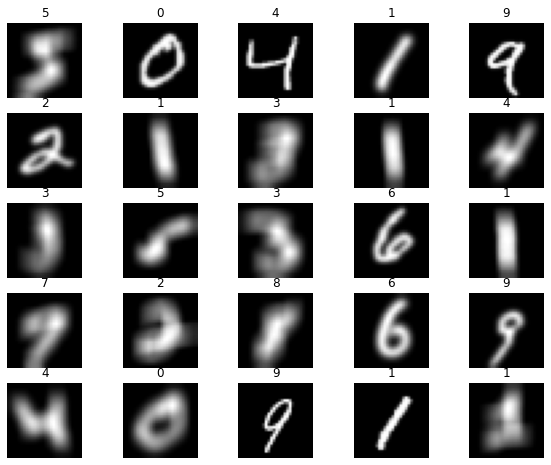

In [ ]:
# look at datasets
import matplotlib.pyplot as plt

# compare firt 25 images
test_ind = range(0, 25)
print(test_ind)

x, _ = train_data_blur[0]
print(x.shape)

# # compare 25 images randomly
# import random
# test_ind = random.sample(range(100), 25)
# print(test_ind)

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = test_ind[i - 1]
    img, label = train_data_blur[sample_idx]
    # img = train_data_erasing[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# # store all five datasets
# def save_data(dataset, name):
#   path = f'/content/gdrive/My Drive/Research/datasets/{name}.pth'
#   print(f'Saving {name} model...')
#   torch.save(dataset, path)
#   print(f'{name} saved successfully.')

# # six runs
# save_data(train_data_orig, 'train_data_orig')
# save_data(train_data_randCrop, 'train_data_randCrop')
# save_data(train_data_blur, 'train_data_blur')
# save_data(train_data_scaling, 'train_data_scaling')
# save_data(train_data_distortion, 'train_data_distortion')
# save_data(train_data_erasing, 'train_data_erasing')




NameError: ignored